In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats as sc
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec

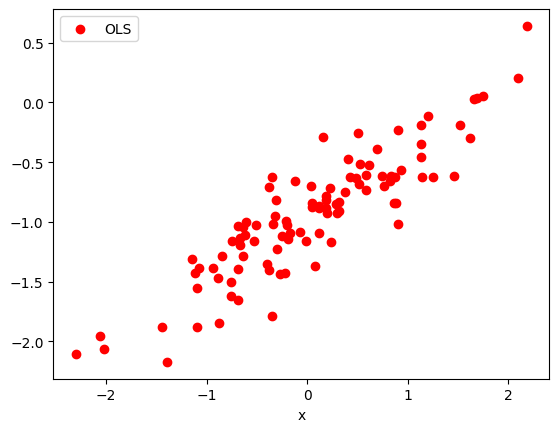

In [2]:
np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
eps = np.random.normal(loc=0, scale=0.25, size=100)
y = -1 + 0.5 * x + eps
fig, ax = plt.subplots()

def plot_graph():
    plt.xlabel("x")
    plt.scatter(x, y, label='OLS', color='red')
    plt.legend()

plot_graph() #Linear dependece, footbal shape

Intercept   -0.963247
x            0.523857
dtype: float64


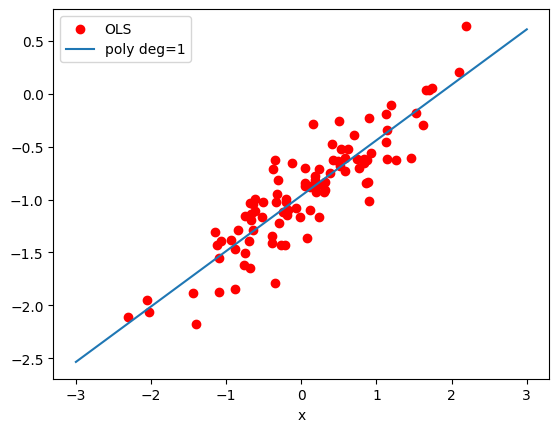

In [3]:
formula = "y ~ x"
df = pd.DataFrame({"x" : x, "y" : y})
model = ols(formula, df).fit()
print(model.params)

def plot_all(**kwargs):
    plot_graph()
    f = np.linspace(-3, 3, 7)

    deg = kwargs.get("deg", 1)

    val = []
    for i in f:
        val.append(model.predict({"x":i}))
    plt.plot(f, val, label=f"poly deg={deg}")
    plt.legend()
    


plot_all()

Intercept   -0.966254
x            0.523405
I(x ** 2)    0.003856
dtype: float64


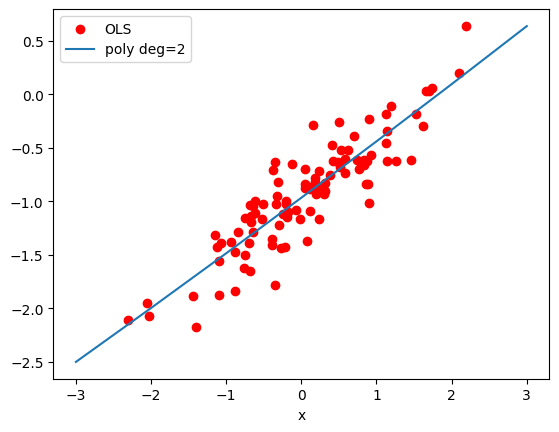

In [4]:
formula = "y ~ x + I(x**2)"
df = pd.DataFrame({"x" : x, "y" : y})
model = ols(formula, df).fit()
plot_all(deg=2)
print(model.params)

Intercept   -0.996619
x            0.497297
dtype: float64
Intercept   -1.000028
x            0.496785
I(x ** 2)    0.004370
dtype: float64
             df     sum_sq    mean_sq            F        PR(>F)
x           1.0  19.376359  19.376359  7087.691117  1.709869e-92
I(x ** 2)   1.0   0.002343   0.002343     0.857219  3.568158e-01
Residual   97.0   0.265179   0.002734          NaN           NaN
Intercept    2.593062e-118
x             2.865786e-92
I(x ** 2)     3.568158e-01
dtype: float64


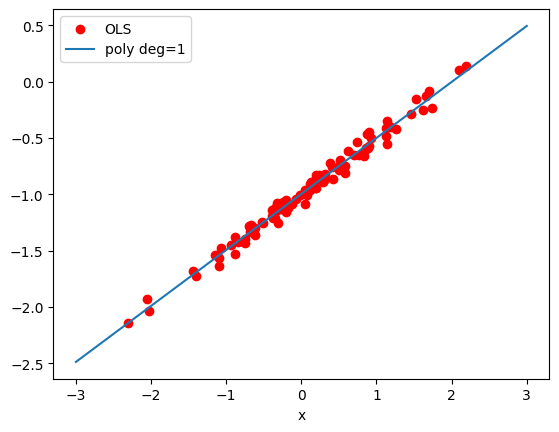

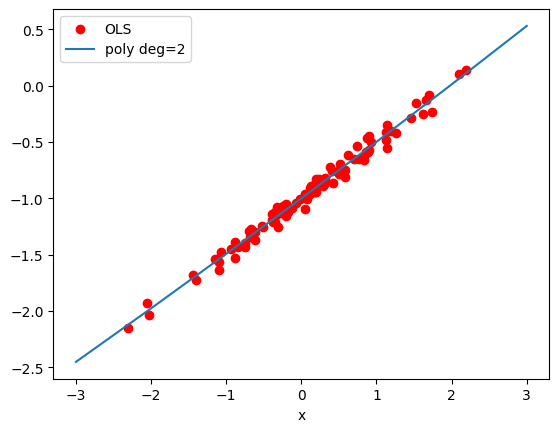

In [ ]:
eps = np.random.normal(loc=0, scale=0.05, size=100)
y = -1 + 0.5 * x + eps

formula = "y ~ x"
df = pd.DataFrame({"x" : x, "y" : y})
model = ols(formula, df).fit()
print(model.params)
plot_all()
plt.subplots()

formula = "y ~ x + I(x**2)"
df = pd.DataFrame({"x" : x, "y" : y})
model = ols(formula, df).fit()
plot_all(deg=2)
print(model.params) #I(x ** 2) is small, thus it is not statistically significant
print(model.pvalues) #Not statistically significant


Intercept   -1.013962
x            0.394347
dtype: float64


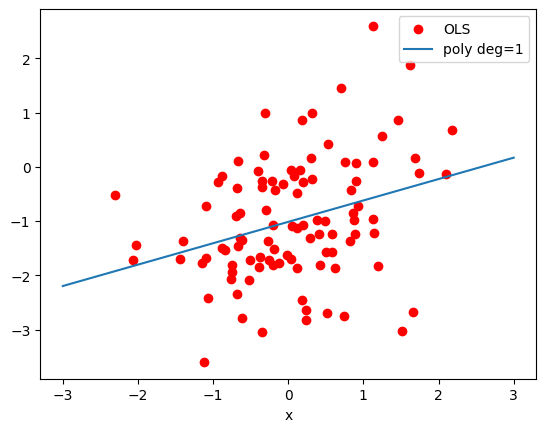

In [6]:
eps = np.random.normal(loc=0, scale=1, size=100) #SE and variance of errors will increase, confidence/prediction intervals will be wider
y = -1 + 0.5 * x + eps

formula = "y ~ x"
df = pd.DataFrame({"x" : x, "y" : y})
model = ols(formula, df).fit()
print(model.params)
plot_all()